# Гидрохимические карты

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import RBFInterpolator

### Ввод имени excel-файла

In [11]:
# Загрузка данных из Excel
file_path = "ХС3.xlsx"  # Замените на путь к вашему файлу
data = pd.read_excel(file_path)

In [14]:
# Просмотр всех данных
data

,Номер скважины,Широта,Долгота,Ca,Mg,Na,NH4,Cl,HCO3,Br,J,Минер.
0,11,58° 13' 6.8500'',68° 12' 5.3700'',309.62,41.47,6386.80,24,10282.50,402.60,65.45,25.44,17.45
1,12,58° 9' 4.6800'',68° 3' 39.6000'',295.59,38.06,6474.73,25,10352.00,451.40,54.88,24.42,17.64
2,15,58° 10' 25.3200'',68° 4' 21.7200'',267.13,39.28,6317.87,26,10056.44,463.60,57.77,23.88,17.17
3,16,58° 15' 41.00'',68° 12' 21.0000'',323.85,44.14,6270.49,30,10142.61,390.40,61.41,22.85,17.20
4,17,58° 15' 25.0000'',68° 12' 33.0000'',396.59,65.06,6292.11,24,10422.40,392.80,61.45,22.95,17.59
5,8,58° 12' 4.0000'',68° 10' 42.0000'',293.00,46.45,6385.00,27,10254.00,414.80,62.24,25.44,17.42
6,9,58° 12' 12.5676'',68° 10' 5.4840'',277.00,45.48,6394.00,30,10198.00,488.00,61.87,24.74,17.43
7,23,58° 27' 28.0000'',68° 27' 57.0000'',247.49,45.36,6115.93,27,9722.91,475.80,61.80,26.23,16.60
8,24,58° 24' 46.0000'',68° 33' 6.0000'',286.37,41.95,6597.09,21,10566.19,402.50,63.00,26.66,17.90
9,25,58° 28' 51.6000'',68° 32' 14.2000'',240.48,42.56,5773.00,30,9197.10,488.00,59.30,26.65,15.70


In [16]:
# Преобразование широты и долготы в десятичные градусы
def convert_to_decimal(coord):
    d, m, s = map(float, coord.replace("''", "").replace("'", "").replace("°", " ").split())
    return d + m / 60 + s / 3600

data["Широта"] = data["Широта"].apply(convert_to_decimal)
data["Долгота"] = data["Долгота"].apply(convert_to_decimal)

In [20]:
# Заданей осей для карт
lat = data["Широта"]
lon = data["Долгота"]

## Интерполяция данных

In [48]:
# Выбор данных для построения - минерализация
mineralization = data["Минер."]

In [50]:
# Создание сетки
grid_lat, grid_lon = np.mgrid[lat.min():lat.max():100j, lon.min():lon.max():100j]
# Интерполяция данных
grid_mineralization = griddata((lat, lon), mineralization, (grid_lat, grid_lon), method='cubic')

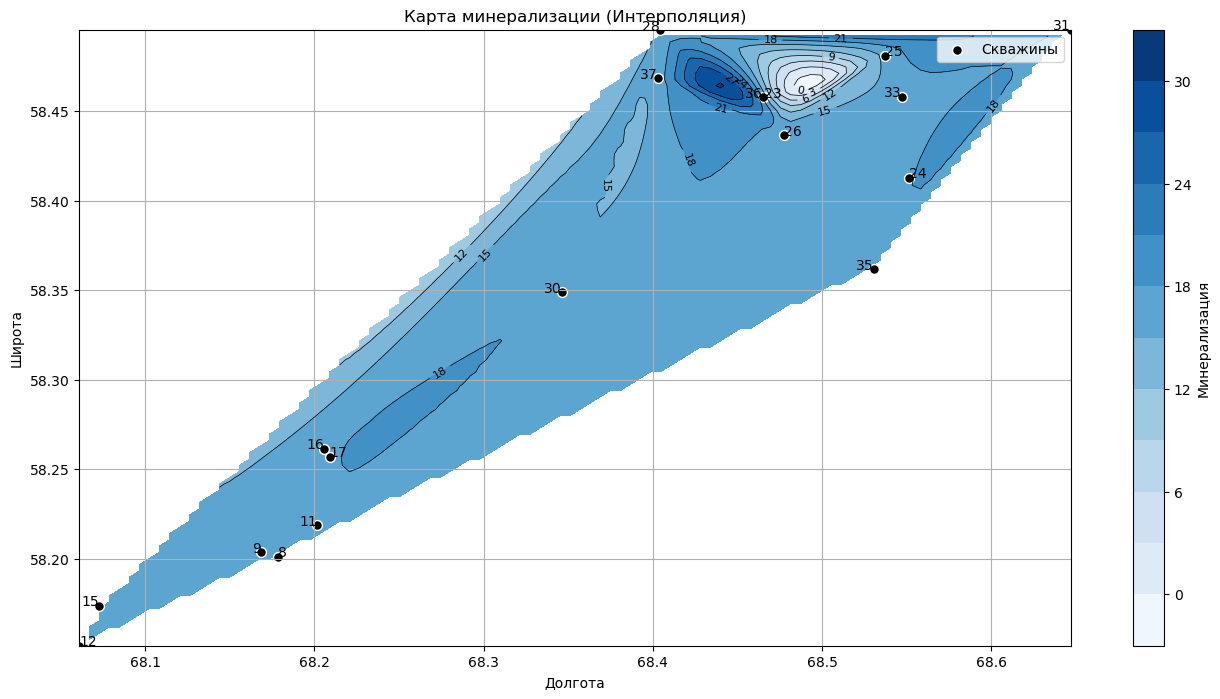

In [52]:
# Построение карты
plt.figure(figsize=(16, 8))

# Отображение данных минерализации (заливка)
contour_fill = plt.contourf(grid_lon, grid_lat, grid_mineralization, levels=10, cmap='Blues')
plt.colorbar(contour_fill, label='Минерализация')

# Изолинии
contour_lines = plt.contour(grid_lon, grid_lat, grid_mineralization, levels=10, colors='black', linewidths=0.5)
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    if i in [1,4,7,5,9,8,10]:
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else:
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Карта минерализации (Интерполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG
plt.savefig('minerlization_int.png', format='png', dpi=300)

plt.show()

### Экстраполяция данных

In [55]:
# Создаем регулярную сетку, расширяя диапазон данных на 0.01 градуса
lat_min, lat_max = lat.min() - 0.01, lat.max() + 0.01  
lon_min, lon_max = lon.min() - 0.01, lon.max() + 0.01
grid_lat, grid_lon = np.meshgrid(
    np.linspace(lat_min, lat_max, 1000),
    np.linspace(lon_min, lon_max, 1000)
)
points = np.array([lat, lon]).T

In [57]:
# Выбор данных для построения - минерализация
mineralization = data["Минер."]

In [59]:
# Создаем интерполятор && Задание параметра сглаживания
rbf_interp = RBFInterpolator(points, mineralization, smoothing=0.0001)

# Интерполируем данные на сетке
grid_mineralization = rbf_interp(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_mineralization = grid_mineralization.reshape(grid_lat.shape)

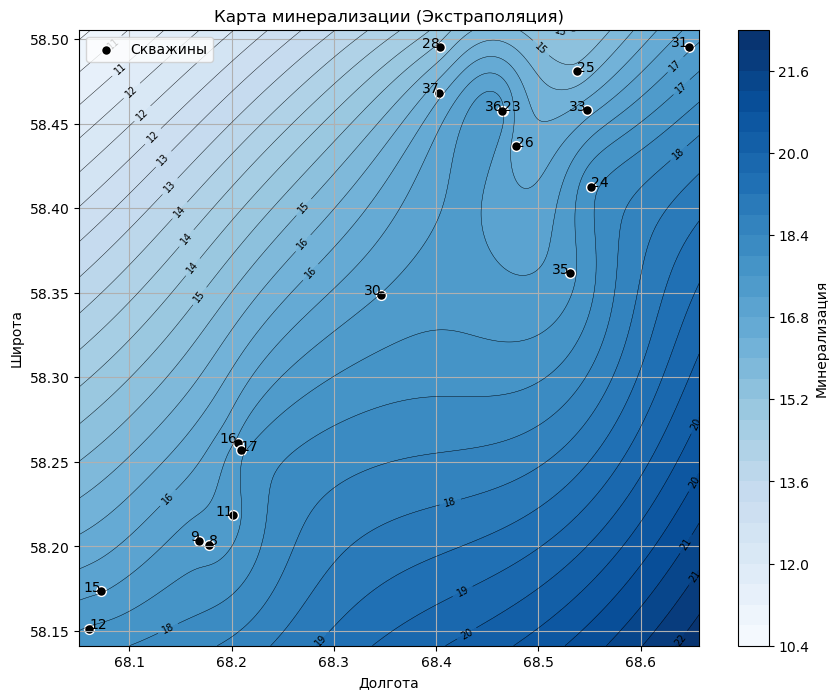

In [61]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_mineralization, levels=30, cmap='Blues')
plt.colorbar(contour_fill, label='Минерализация')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_mineralization, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Карта минерализации (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('minerlization_ext.png', format='png', dpi=300)

plt.show()

## Построение экстраполяций для других химических элементов

In [64]:
# Экстраполяция данных && Выбор данных для построения - Йод
j = data["J"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_j = RBFInterpolator(points, j, smoothing=0.000001)

# Интерполируем данные на сетке && Ввод имени
grid_j = rbf_interp_j(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_j = grid_j.reshape(grid_lat.shape)

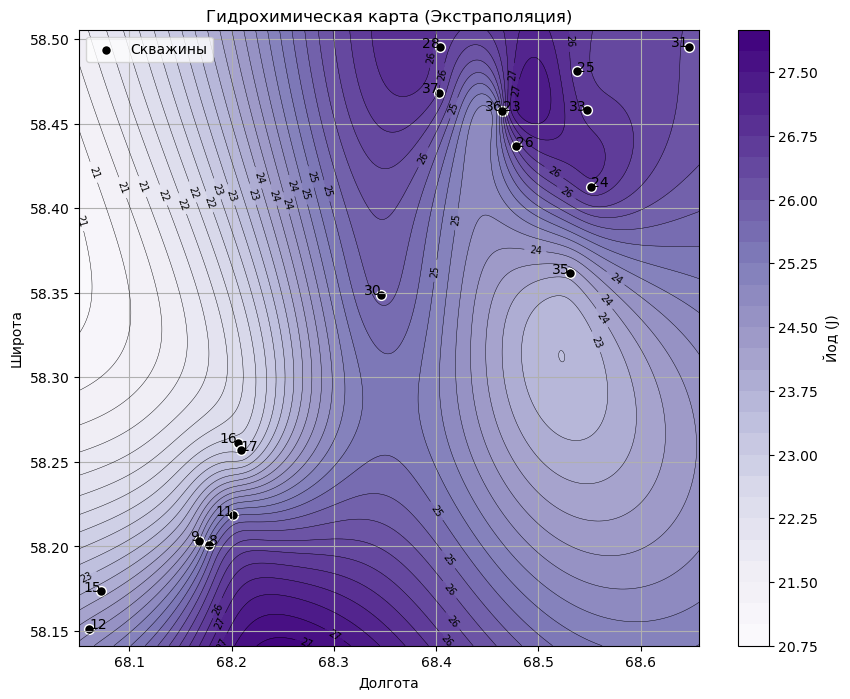

In [66]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_j, levels=30, cmap='Purples')
plt.colorbar(contour_fill, label='Йод (J)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_j, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('j.png', format='png', dpi=300)

plt.show()

In [70]:
# Экстраполяция данных && Выбор данных для построения - Бром
br = data["Br"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_br = RBFInterpolator(points, br, smoothing=0.000001)

# Интерполируем данные на сетке && Ввод имени
grid_br = rbf_interp_br(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_br = grid_br.reshape(grid_lat.shape)

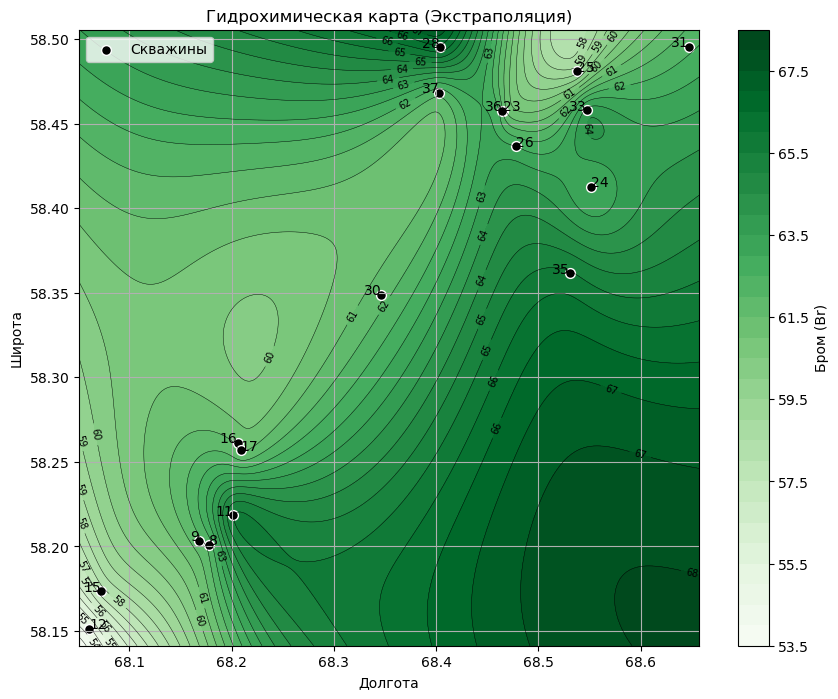

In [72]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_br, levels=30, cmap='Greens')
plt.colorbar(contour_fill, label='Бром (Br)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_br, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('br.png', format='png', dpi=300)

plt.show()

In [94]:
# Экстраполяция данных && Выбор данных для построения - Магний
mg = data["Mg"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_mg = RBFInterpolator(points, mg, smoothing=0.001)

# Интерполируем данные на сетке && Ввод имени
grid_mg = rbf_interp_mg(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_mg = grid_mg.reshape(grid_lat.shape)

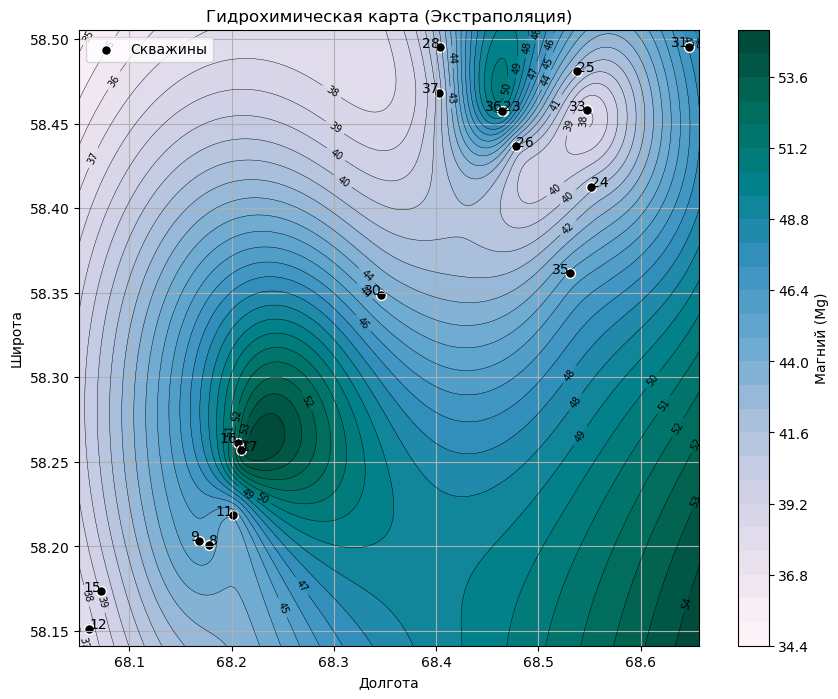

In [96]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_mg, levels=30, cmap='PuBuGn')
plt.colorbar(contour_fill, label='Магний (Mg)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_mg, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('mg.png', format='png', dpi=300)

plt.show()

In [106]:
# Экстраполяция данных && Выбор данных для построения - Аммоний
nh = data["NH4"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_nh = RBFInterpolator(points, nh, smoothing=0.001)

# Интерполируем данные на сетке && Ввод имени
grid_nh = rbf_interp_nh(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_nh = grid_nh.reshape(grid_lat.shape)

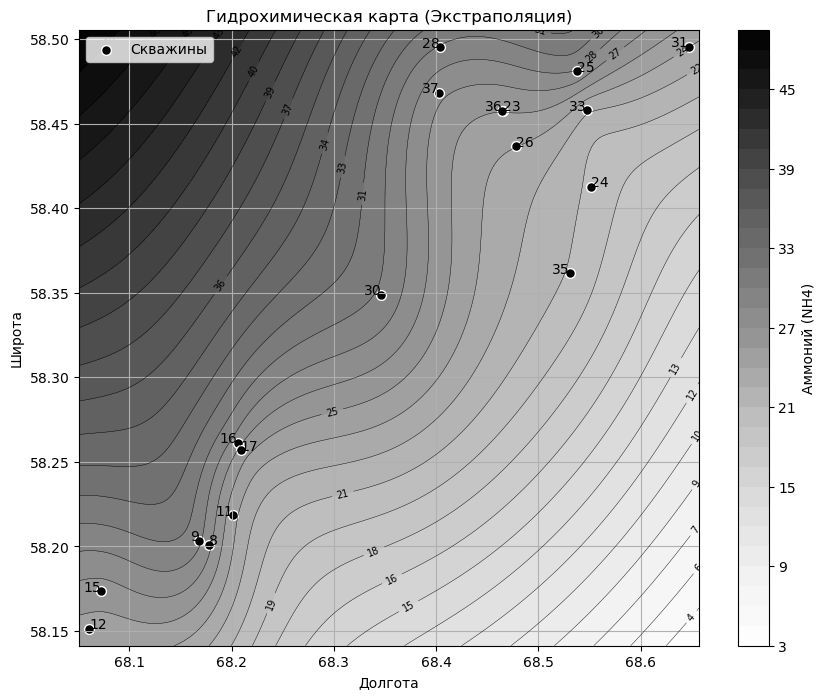

In [107]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_nh, levels=30, cmap='Grays')
plt.colorbar(contour_fill, label='Аммоний (NH4)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_nh, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('nh.png', format='png', dpi=300)

plt.show()

In [126]:
# Экстраполяция данных && Выбор данных для построения - Кальций
ca = data["Ca"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_ca = RBFInterpolator(points, ca, smoothing=0.0001)

# Интерполируем данные на сетке && Ввод имени
grid_ca = rbf_interp_ca(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_ca = grid_ca.reshape(grid_lat.shape)

# При необходимости можно ввести ограничения на максимальное и минимальное значение
grid_ca = np.maximum(grid_ca, 0)     # Ограничиваем снизу
grid_ca = np.minimum(grid_ca, 500)    # Ограничиваем сверху

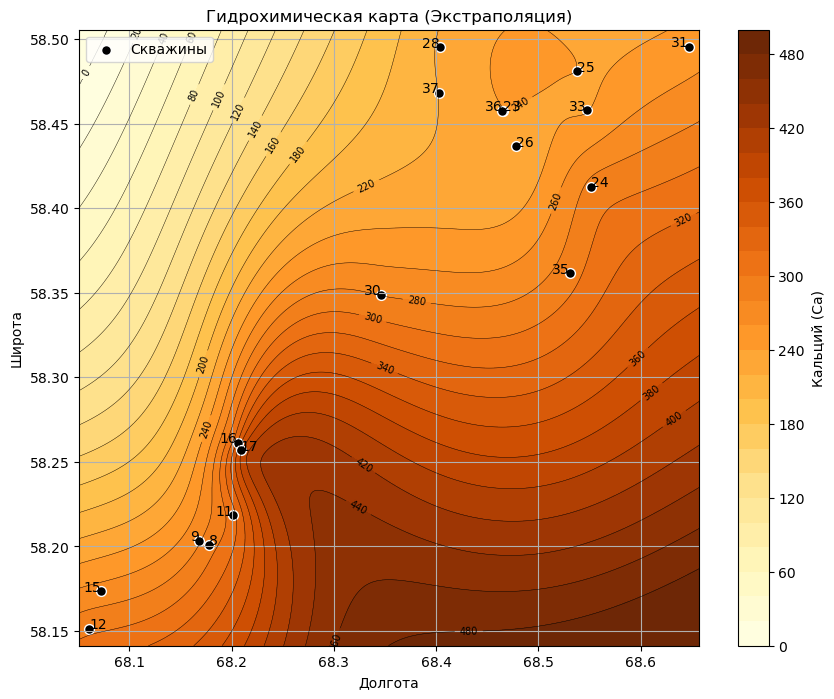

In [127]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_ca, levels=30, cmap='YlOrBr')
plt.colorbar(contour_fill, label='Кальций (Ca)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_ca, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('ca.png', format='png', dpi=300)

plt.show()

In [130]:
# Экстраполяция данных && Выбор данных для построения - Натрий
na = data["Na"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_na = RBFInterpolator(points, na, smoothing=0.00001)

# Интерполируем данные на сетке && Ввод имени
grid_na = rbf_interp_na(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_na = grid_na.reshape(grid_lat.shape)

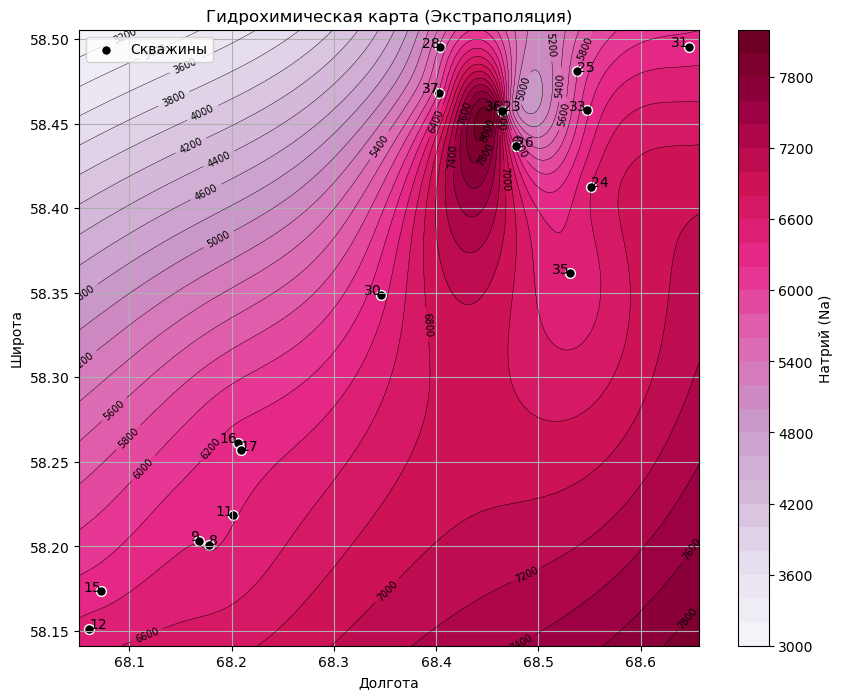

In [132]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_na, levels=30, cmap='PuRd')
plt.colorbar(contour_fill, label='Натрий (Na)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_na, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('na.png', format='png', dpi=300)

plt.show()

In [134]:
# Экстраполяция данных && Выбор данных для построения - Хлор
cl = data["Cl"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_cl = RBFInterpolator(points, cl, smoothing=0.0000001)

# Интерполируем данные на сетке && Ввод имени
grid_cl = rbf_interp_cl(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_cl = grid_cl.reshape(grid_lat.shape)

# При необходимости можно ввести ограничения на максимальное и минимальное значение
#grid_cl = np.maximum(grid_cl, 0)     # Ограничиваем снизу
#grid_cl = np.minimum(grid_cl, 500)    # Ограничиваем сверху

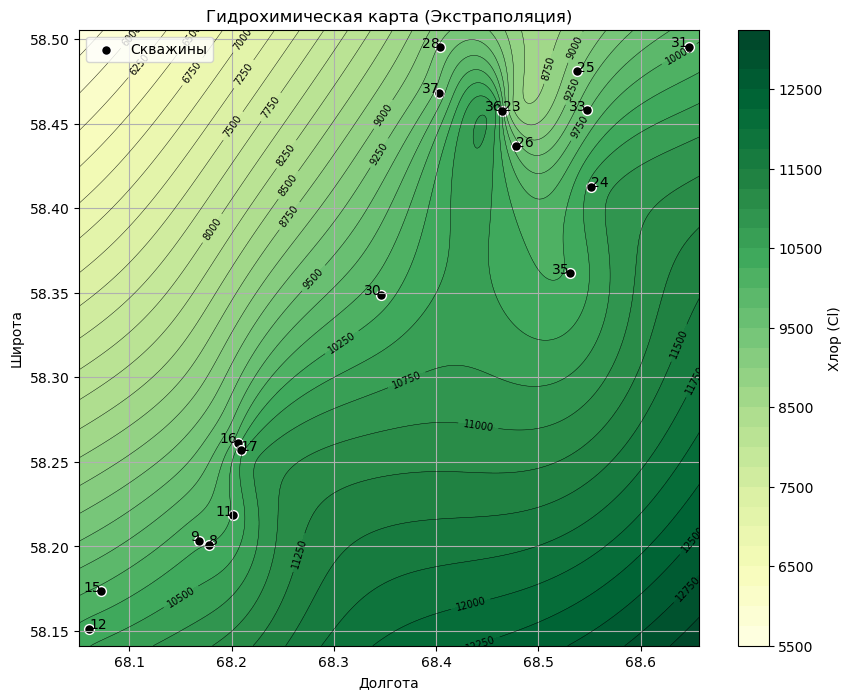

In [136]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_cl, levels=30, cmap='YlGn')
plt.colorbar(contour_fill, label='Хлор (Cl)')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_cl, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('cl.png', format='png', dpi=300)

plt.show()

In [140]:
# Экстраполяция данных && Выбор данных для построения - HCO3
hc = data["HCO3"]

# Создаем интерполятор && Ввод имени && Задание параметра сглаживания
rbf_interp_hc = RBFInterpolator(points, hc, smoothing=0.000001)

# Интерполируем данные на сетке && Ввод имени
grid_hc = rbf_interp_hc(np.column_stack([grid_lat.ravel(), grid_lon.ravel()]))
grid_hc = grid_hc.reshape(grid_lat.shape)

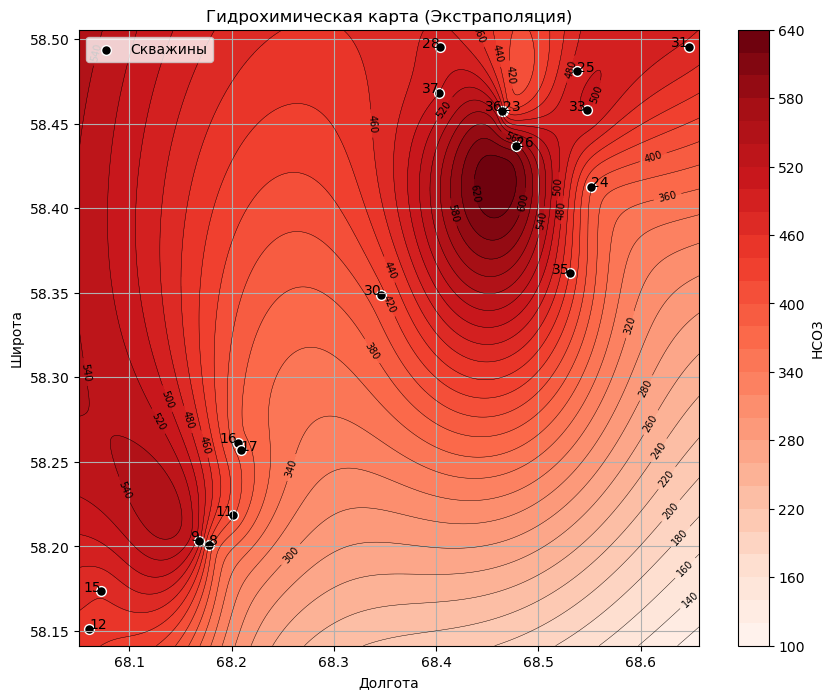

In [142]:
# Построение карты
plt.figure(figsize=(10, 8))

# Отображение данных (заливка) && Ввод названия сетки данных && Выбор количества уровней && Выбор цветовой палитры && Подпись карты
contour_fill = plt.contourf(grid_lon, grid_lat, grid_hc, levels=30, cmap='Reds')
plt.colorbar(contour_fill, label='HCO3')

# Изолинии  && Ввод названия сетки данных && Выбор количества уровней && Выбор стиля линий
contour_lines = plt.contour(grid_lon, grid_lat, grid_hc, levels=30, colors='black', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fontsize=7, fmt='%d')  # Подписи к изолиниям

# Точки скважин
plt.scatter(lon, lat, c='black', edgecolor='white', s=50, label='Скважины')
for i, row in data.iterrows():
    # В случае необходимости позиционирования номеров скважин по разным сторонам
    if i in [1,4,7,5,9,8,10]: # Подписи справа
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')
    else: # Подписи слева
        plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='right', color='black')
    # Иначе, все подписи справа:
    #plt.text(row["Долгота"], row["Широта"], str(int(row["Номер скважины"])), fontsize=10, ha='left', color='black')

# Настройка осей
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title("Гидрохимическая карта (Экстраполяция)")
plt.legend()
plt.grid(True)

# Сохранение карты в файл PNG && Ввод названия файла
plt.savefig('hco.png', format='png', dpi=300)

plt.show()

In [146]:
# При необходимости ручного ввода уровней изолиний
#contour_lines = plt.contour(grid_lon, grid_lat, grid_hc, levels=30, colors='black', linewidths=0.3, manual=False, levels=[440., 480., 520.])